## Audio Duration & Quality Analysis
(file stored in `.csv` file)

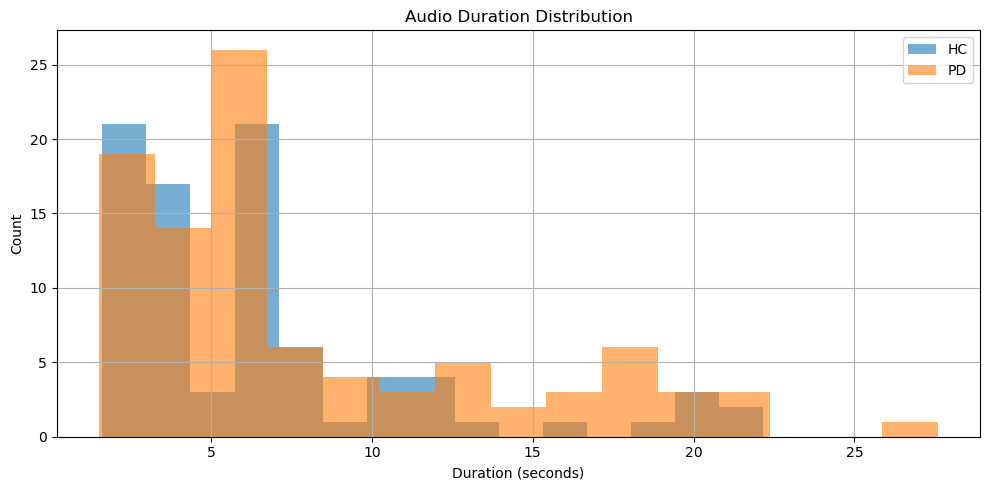

Duration stats (seconds):
count    180.000000
mean       7.322190
std        5.557091
min        1.516125
25%        3.339469
50%        5.766687
75%        9.099154
max       27.600000
Name: duration_sec, dtype: float64


In [1]:
import os
import soundfile as sf
import pandas as pd
import matplotlib.pyplot as plt

# Paths
data_dirs = {
    "HC": "data-source/audio/HC_AH",
    "PD": "data-source/audio/PD_AH"
}

records = []

for label, folder in data_dirs.items():
    for fname in os.listdir(folder):
        if fname.endswith(".wav"):
            path = os.path.join(folder, fname)
            try:
                with sf.SoundFile(path) as f:
                    duration = len(f) / f.samplerate
                    bit_rate = f.samplerate * f.channels * f.subtype_info  # info only, rough estimation
                    records.append({
                        "label": label,
                        "filename": fname,
                        "duration_sec": duration,
                        "sample_rate": f.samplerate,
                        "bit_depth": f.subtype_info
                    })
            except RuntimeError as e:
                print(f"Failed to read {fname}: {e}")

# Save to CSV
df = pd.DataFrame(records)
df.to_csv("audio_metadata.csv", index=False)

# Plot durations
plt.figure(figsize=(10, 5))
for label in df['label'].unique():
    subset = df[df['label'] == label]
    plt.hist(subset['duration_sec'], bins=15, alpha=0.6, label=label)
plt.title("Audio Duration Distribution")
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("duration_distribution.png")
plt.show()

# Print stats
print("Duration stats (seconds):")
print(df['duration_sec'].describe())


#### Check the shape of the spectrograms
(for two random audio, after `milestone1_skeleton.py` execution) --> all of them should be equal

In [ ]:
import numpy as np
from pathlib import Path

CACHE_DIR = Path("artifacts/mel_specs")
healty = np.load(CACHE_DIR / "HC_AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2.npy")
sick = np.load(CACHE_DIR / "PD_AH_545629296-C2C009C6-8C17-42EA-B6BE-362942FC4692.npy")

print(f"Healthy sample shape: {healty.shape}")
print(f"Sick sample shape: {sick.shape}")

assert healty.shape == sick.shape, "Shape mismatch between healthy and sick samples"

Healthy sample shape: (1024, 64)
Sick sample shape: (1024, 64)
